In [1]:
import json
from detector_client import DetectorClient

In [2]:
client = DetectorClient()

detector_name = "yolo_default"

In [3]:
response = client.get_metadata(detector_name)

print(json.dumps(response, indent=4, ensure_ascii=False))

{
    "name": "yolo_default",
    "type": "yolo8s",
    "model": "/models/yolo_v8_model.pt",
    "dataset": "/datasets/yolo_v8_model/",
    "version": "1.0"
}


In [4]:
response = client.get_list()

response

['yolo_default', 'yolo_tmp']

In [5]:
response = client.run_train(detector_name, "dataset_path")

response

{'detector_name': 'yolo_default', 'dataset_path': 'dataset_path'}

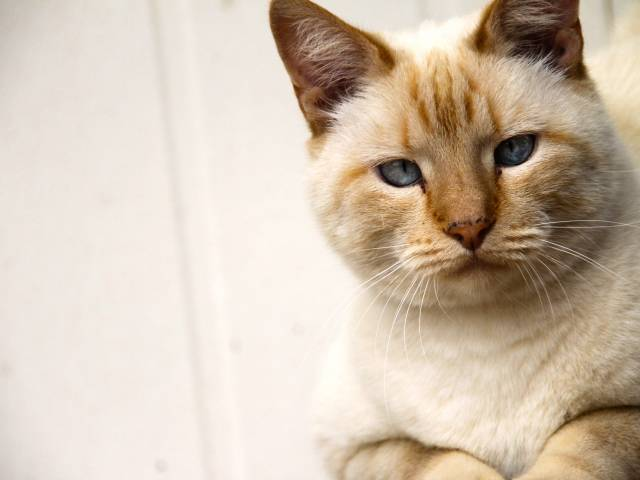

In [6]:
import io
import base64
from PIL import Image

with open("./detectors/cat.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    encoded_image = encoded_string.decode('utf-8')

img_data = base64.b64decode(encoded_image)
Image.open(io.BytesIO(img_data))


In [8]:
encoded_image

'/9j/4AAQSkZJRgABAQAAAQABAAD//gA7Q1JFQVRPUjogZ2QtanBlZyB2MS4wICh1c2luZyBJSkcgSlBFRyB2NjIpLCBxdWFsaXR5ID0gNzAK/9sAQwAKBwcIBwYKCAgICwoKCw4YEA4NDQ4dFRYRGCMfJSQiHyIhJis3LyYpNCkhIjBBMTQ5Oz4+PiUuRElDPEg3PT47/9sAQwEKCwsODQ4cEBAcOygiKDs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7/8AAEQgB4AKAAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A61RUgpi1KvasixQtPAoHNOUUAKtPUCgCpFFFgADApRRinAUDFUU8CkUU8dKBCHrThSY5pcUALThTRR3oAfQaQUU

In [9]:
response = client.run_predict(detector_name, encoded_image)

response

[{'class': 'cat'}]